In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=163H6DPAFmGAxg6XGJUR5dygAlm81ZR1X'
output = '/content/HV-AI-2024.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=163H6DPAFmGAxg6XGJUR5dygAlm81ZR1X
From (redirected): https://drive.google.com/uc?id=163H6DPAFmGAxg6XGJUR5dygAlm81ZR1X&confirm=t&uuid=9b79cdad-12c8-404a-bb16-784e100e86f8
To: /content/HV-AI-2024.zip
100%|██████████| 1.14G/1.14G [00:22<00:00, 50.2MB/s]


'/content/HV-AI-2024.zip'

#How to add the file to gdrive

1. Open the drive link shared
2. Click the three dots next to ***HV-AI-2024*** and select 'Make a copy'

In [ ]:
!unzip /content/HV-AI-2024.zip

Streaming output truncated to the last 5000 lines.
  inflating: HV-AI-2024/images/train/84_4878.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._84_4878.jpg  
  inflating: HV-AI-2024/images/train/16_894.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._16_894.jpg  
  inflating: HV-AI-2024/images/train/43_2439.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._43_2439.jpg  
  inflating: HV-AI-2024/images/train/68_3954.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._68_3954.jpg  
  inflating: HV-AI-2024/images/train/116_6753.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._116_6753.jpg  
  inflating: HV-AI-2024/images/train/18_974.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._18_974.jpg  
  inflating: HV-AI-2024/images/train/115_6674.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._115_6674.jpg  
  inflating: HV-AI-2024/images/train/37_2090.jpg  
  inflating: __MACOSX/HV-AI-2024/images/train/._37_2090.jpg  
  inflating: HV-AI-2024/images/train/111_6483

In [ ]:
!rm -rf /content/__MACOSX
!mv /content/HV-AI-2024/* /content/
!rm -rf /content/HV-AI-2024
!rm /content/HV-AI-2024.zip
!rm -rf /content/sample_data
from google.colab import output
output.clear()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
import random
from tensorflow.keras.layers import Lambda
from tensorflow.keras.applications import InceptionV3

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Plot Sample Images**

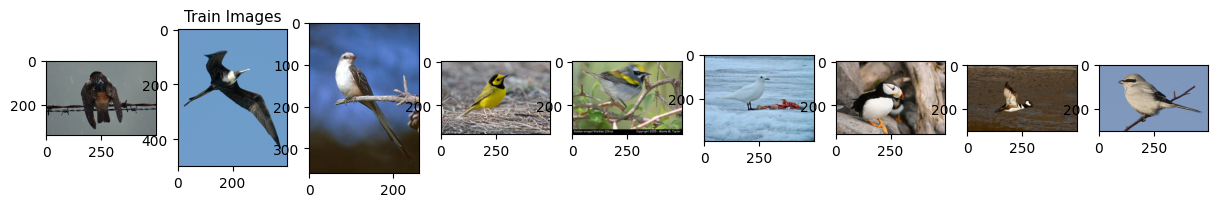

In [ ]:
train_images = glob('images/train/*.jpg')[0:9]
test_images = glob('images/test/*.jpg')[0:9]

fig, axes = plt.subplots(1, 9, figsize=(15, 5))
for i, image in enumerate(train_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Train Images',fontsize=11)
plt.show()

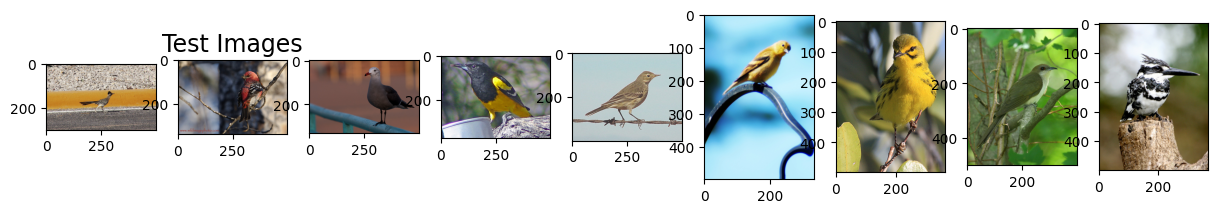

In [ ]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))
for i, image in enumerate(test_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Test Images',fontsize=17)
plt.show()


# **Load/Preprocess **data****

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/train.csv')

In [ ]:
train_df['bbox'] = train_df['bbox'].apply(lambda x: tuple(map(float, x.split())))

In [ ]:
train_df

path  class                          bbox
0           images/train/1_2.jpg      0   (139.0, 30.0, 153.0, 264.0)
1           images/train/1_4.jpg      0   (112.0, 90.0, 255.0, 242.0)
2           images/train/1_5.jpg      0    (70.0, 50.0, 134.0, 303.0)
3           images/train/1_7.jpg      0     (7.0, 75.0, 420.0, 262.0)
4           images/train/1_8.jpg      0    (78.0, 86.0, 333.0, 158.0)
...                          ...    ...                           ...
5989  images/train/200_11778.jpg    199   (35.0, 115.0, 290.0, 197.0)
5990  images/train/200_11781.jpg    199    (41.0, 33.0, 379.0, 426.0)
5991  images/train/200_11782.jpg    199  (140.0, 125.0, 144.0, 172.0)
5992  images/train/200_11784.jpg    199    (89.0, 95.0, 354.0, 250.0)
5993  images/train/200_11787.jpg    199     (3.0, 20.0, 408.0, 307.0)

[5994 rows x 3 columns]

In [ ]:
train_df['class'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5989    False
5990    False
5991    False
5992    False
5993    False
Name: class, Length: 5994, dtype: bool

In [ ]:
train_df['class'].value_counts()

class
0      30
149    30
124    30
126    30
127    30
       ..
125    29
189    29
106    29
140    29
195    29
Name: count, Length: 200, dtype: int64

## **Plotting Bounding box**

In [ ]:
def vis_rect(image_path, bbox):

  """
    Visualizes an image with a rectangular bounding box overlay.

    Parameters:
    -----------
    image_path : str
        The file path to the image that will be displayed.

    bbox : list or tuple
        The bounding box coordinates in the format [x_min, y_min, x_max, y_max],
        where:
        - x_min, y_min: The (x, y) coordinates of the lower left corner of the bounding box.
        - x_max, y_max: The (x, y) coordinates of the upper right corner of the bounding box.

    Returns:
    --------
    matplotlib.patches.Rectangle
        A matplotlib rectangle patch that represents the bounding box drawn on the image.

    Example:
    --------
    image_path = 'image.jpg'
    bbox = [50, 50, 200, 200]  # Example bounding box coordinates
    vis_rect(image_path, bbox)

    This will display the image and draw a red bounding box based on the provided coordinates.

    """
  image = Image.open(image_path)
  ig, ax = plt.subplots()
  ax.imshow(image)
  rect = patches.Rectangle(
      (bbox[0], bbox[1]),
      bbox[2] - bbox[0]+(bbox[0]+bbox[2])//2, # width
      bbox[3],   # height
      linewidth=2,
      edgecolor='red',
      facecolor='none'
  )
  data = ax.add_patch(rect)
  return data

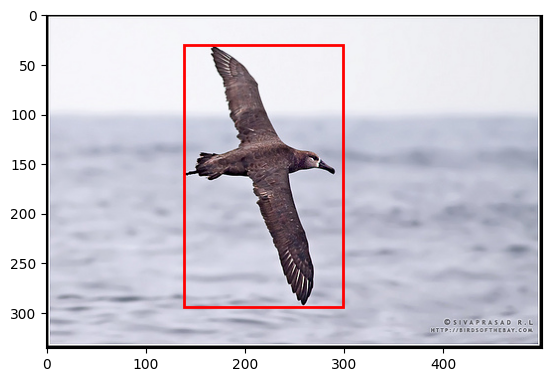

In [ ]:
img = vis_rect('images/train/1_2.jpg', [139.0, 30.0, 153.0, 264.0])

## **Cropping Image according to bounding box**

In [ ]:
def crop_image(image_path, bbox):


  image = Image.open(image_path)

  new_bbox=[bbox[0],bbox[1]+bbox[3],bbox[0]+bbox[2] - bbox[0]+(bbox[0]+bbox[2])//2,bbox[1]]

  left, lower, right, upper = new_bbox

  if right>left and lower>upper:
      cropped_image = image.crop((left, upper, right, lower))
      return cropped_image
  else:
      return image

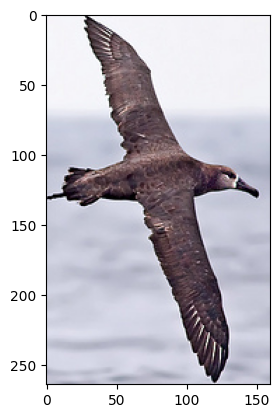

In [ ]:
img = crop_image('images/train/1_2.jpg', [139.0, 30.0, 153.0, 264.0])
plt.imshow(img)

## **Store all images in separate folders**

In [ ]:


def create_folders(root_folder, num_classes=200):

    if not os.path.exists(root_folder):
        os.makedirs(root_folder)

    for i in range(num_classes):
        class_folder = os.path.join(root_folder, f"Class_{i}")
        os.makedirs(class_folder, exist_ok=True)


def process_images(df, root_folder):
    """
    Processes images by cropping them based on bounding box coordinates and saving them into class-specific folders.

    Parameters:
    -----------
    df : pandas.DataFrame
        A DataFrame containing information about images. It should have the following columns:
        - 'path': The file path to the image.
        - 'class': The class label for the image (used to determine the target folder).
        - 'bbox': The bounding box coordinates for cropping, in the format [x_min, y_min, x_max, y_max].

    root_folder : str
        The path to the root folder where class subfolders are located or will be created. Each class folder will be named "Class_<class_name>".

    Returns:
    --------
    None
        This function does not return a value. It processes and saves images into directories.
    """
    for idx, row in df.iterrows():
        image_path = row['path']
        class_name = row['class']
        bbox = row['bbox']


        cropped_img = crop_image(image_path, bbox)

        class_folder = os.path.join(root_folder, f"Class_{class_name}")

        img_name = f"{os.path.basename(image_path).split('.')[0]}.jpg"
        img_save_path = os.path.join(class_folder, img_name)

        # Save the cropped image
        cropped_img.save(img_save_path)



create_folders('/content/image_data', num_classes=200)
process_images(train_df, '/content/image_data')


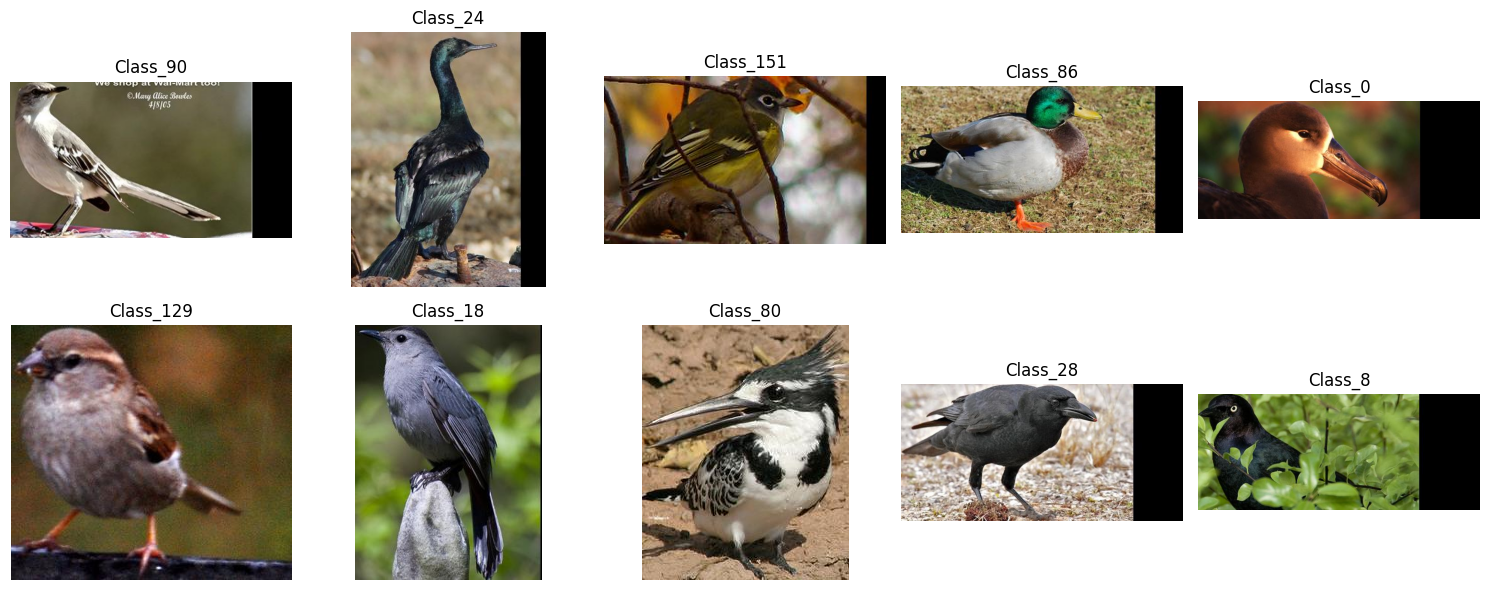

In [ ]:
#Visulaizing sample images

data_folder = '/content/image_data'
classes = os.listdir(data_folder)
random_classes = random.sample(classes, 10)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, class_folder in enumerate(random_classes):
    class_folder_path = os.path.join(data_folder, class_folder)
    image_files = os.listdir(class_folder_path)
    random_image = random.choice(image_files)


    img = mpimg.imread(os.path.join(class_folder_path, random_image))
    axes[i].imshow(img)
    axes[i].set_title(class_folder)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## **Spliting the image data into Train and Test**

In [ ]:
import os
import shutil

def distribute_images(train_data_path='image_data', final_train_path='train_data', final_test_path='test_data', train_split=25):
    # Create the Final_train and Final_test directories
    os.makedirs(final_train_path, exist_ok=True)
    os.makedirs(final_test_path, exist_ok=True)

    # Get the class directories from Train_data
    class_dirs = [d for d in os.listdir(train_data_path) if os.path.isdir(os.path.join(train_data_path, d))]

    for class_dir in class_dirs:
        # Create corresponding directories in Final_train and Final_test
        os.makedirs(os.path.join(final_train_path, class_dir), exist_ok=True)
        os.makedirs(os.path.join(final_test_path, class_dir), exist_ok=True)

        # Get all image files in the class directory
        image_files = [f for f in os.listdir(os.path.join(train_data_path, class_dir)) if os.path.isfile(os.path.join(train_data_path, class_dir, f))]

        # Sort the files if necessary (depends on your naming convention)
        image_files.sort()

        # Split files into train and test sets
        train_files = image_files[:train_split]
        test_files = image_files[train_split:]

        # Move train files
        for file_name in train_files:
            src_path = os.path.join(train_data_path, class_dir, file_name)
            dst_path = os.path.join(final_train_path, class_dir, file_name)
            shutil.move(src_path, dst_path)

        # Move test files
        for file_name in test_files:
            src_path = os.path.join(train_data_path, class_dir, file_name)
            dst_path = os.path.join(final_test_path, class_dir, file_name)
            shutil.move(src_path, dst_path)



# Example usage
distribute_images()


## **Test Data Viz**

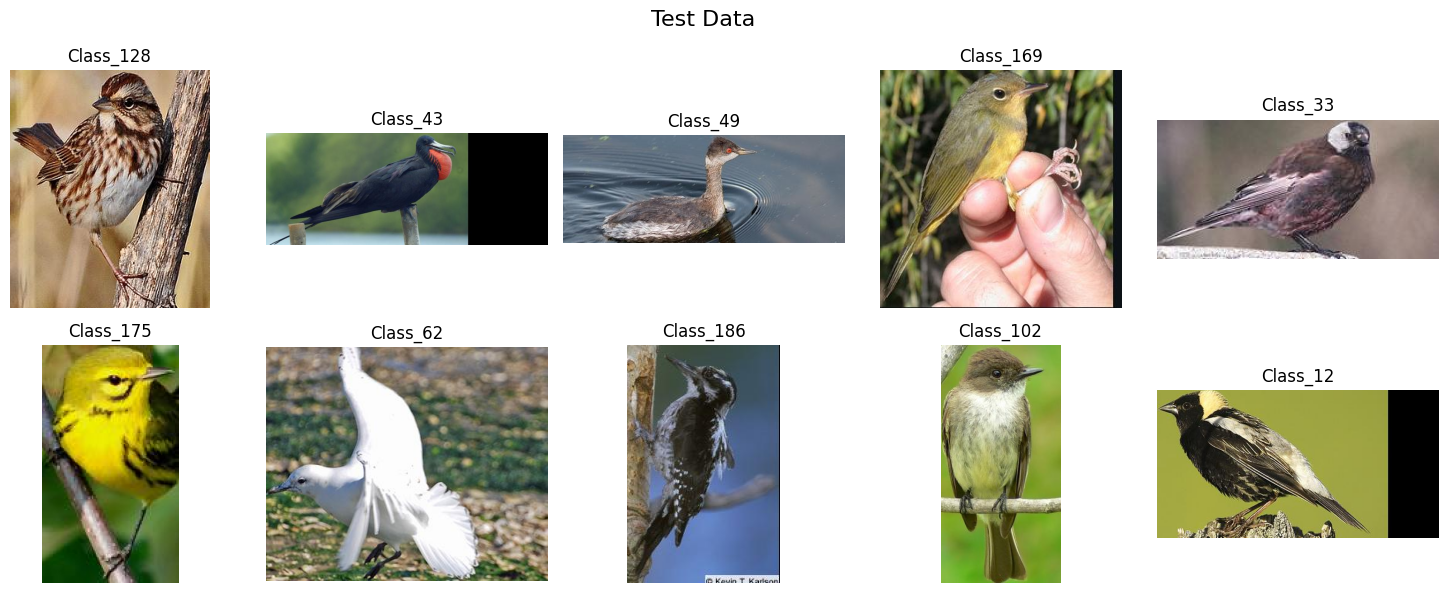

In [ ]:
# Set the path to your data folder
data_folder = '/content/final_test'

# Get all the class folders
classes = os.listdir(data_folder)

# Choose 10 random class folders
random_classes = random.sample(classes, 10)

# Initialize a figure to plot 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Loop through each selected random class
for i, class_folder in enumerate(random_classes):
    # Get the image file from the class folder
    class_folder_path = os.path.join(data_folder, class_folder)
    image_files = os.listdir(class_folder_path)
    # Select a random image from the folder
    random_image = random.choice(image_files)

    # Load and display the image
    img = mpimg.imread(os.path.join(class_folder_path, random_image))
    axes[i].imshow(img)
    axes[i].set_title(class_folder)
    axes[i].axis('off')
fig.suptitle('Test Data', fontsize=16)
plt.tight_layout()
plt.show()

## **Train Data Viz**

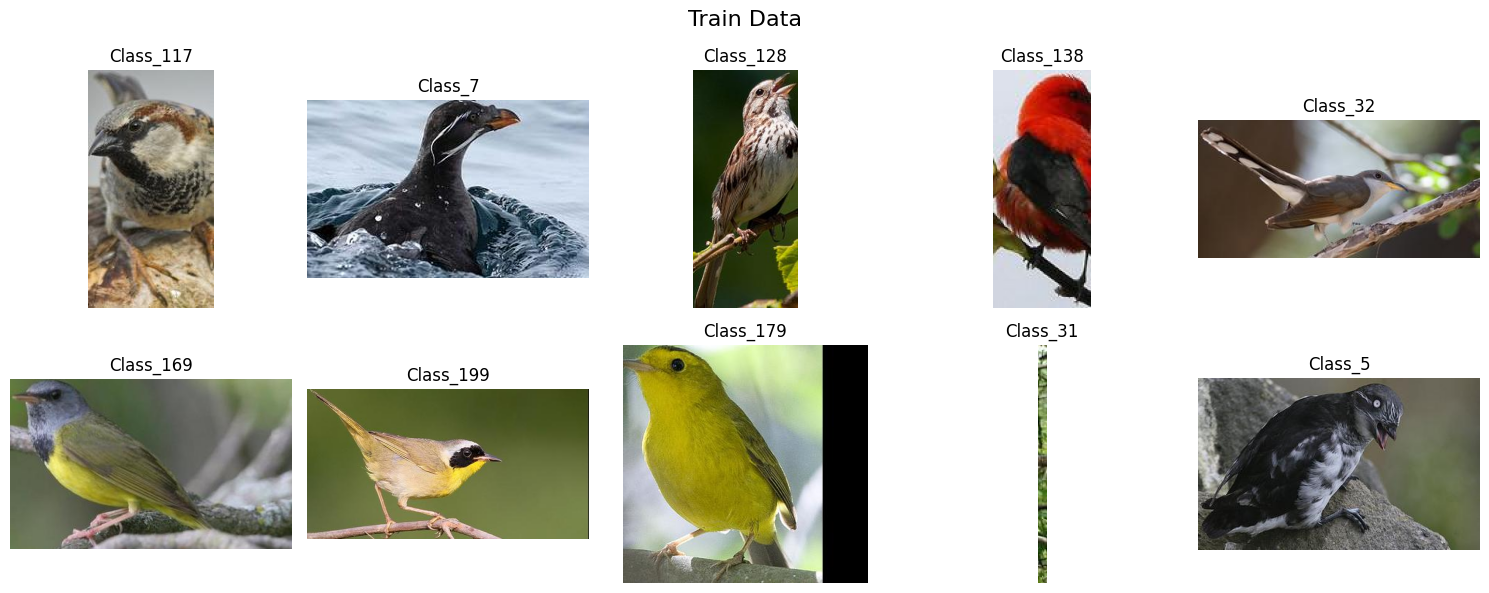

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to your data folder
data_folder = '/content/final_train'

# Get all the class folders
classes = os.listdir(data_folder)

# Choose 10 random class folders
random_classes = random.sample(classes, 10)

# Initialize a figure to plot 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Loop through each selected random class
for i, class_folder in enumerate(random_classes):
    # Get the image file from the class folder
    class_folder_path = os.path.join(data_folder, class_folder)
    image_files = os.listdir(class_folder_path)
    # Select a random image from the folder
    random_image = random.choice(image_files)

    # Load and display the image
    img = mpimg.imread(os.path.join(class_folder_path, random_image))
    axes[i].imshow(img)
    axes[i].set_title(class_folder)
    axes[i].axis('off')
fig.suptitle('Train Data', fontsize=16)
plt.tight_layout()
plt.show()

## **Return Image Count**

In [ ]:
def count_images_in_folders(directory):
    """
    Count the number of images in each subfolder of the given directory.

    Args:
        directory (str): The path to the main directory that contains subfolders for different classes.

    Returns:
        dict: A dictionary where the keys are the class folder names and the values are the number of image files in each folder.
    """
    class_dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    image_counts = {}
    for class_dir in class_dirs:
        class_path = os.path.join(directory, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        image_counts[class_dir] = len(image_files)
    return image_counts

In [ ]:
final_train_path = '/content/final_test'
r = 0
image_counts = count_images_in_folders(final_train_path)
for class_dir, count in image_counts.items():
    r += count
print(r)

1394


## **Return the Image Size**

In [ ]:
folder_path = '/content/final_train/Class_0'
image_files = os.listdir(folder_path)
image_files = [file for file in image_files if file.endswith(('png', 'jpg', 'jpeg'))]
for i in range(3):
    first_image_path = os.path.join(folder_path, image_files[i])
    with Image.open(first_image_path) as img:
        # Get the image size
        width, height = img.size
    print(f"The size of the first image is {width}x{height} pixels.")

The size of the first image is 686x294 pixels.
The size of the first image is 416x139 pixels.
The size of the first image is 393x225 pixels.


## **Resizing image into size (224,224)**

In [ ]:
def resize_images(source_dir, resize_size=(224, 224)):

    # Loop through each class folder
    for class_folder in os.listdir(source_dir):
        class_folder_path = os.path.join(source_dir, class_folder)
        if os.path.isdir(class_folder_path):
            # Loop through each image in the class folder
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                # Open and resize the image
                with Image.open(image_path) as img:
                    resized_img = img.resize(resize_size, Image.ANTIALIAS)
                    # Save the resized image back to the same path
                    resized_img.save(image_path)

    print(f"All images in {source_dir} have been resized to {resize_size}!")

In [ ]:
train_dir = '/content/final_train'
test_dir = '/content/final_test'

# Resize images in both directories
resize_images(train_dir)
resize_images(test_dir)

All images in /content/final_train have been resized to (224, 224)!
All images in /content/final_test have been resized to (224, 224)!


## **Plotting images**

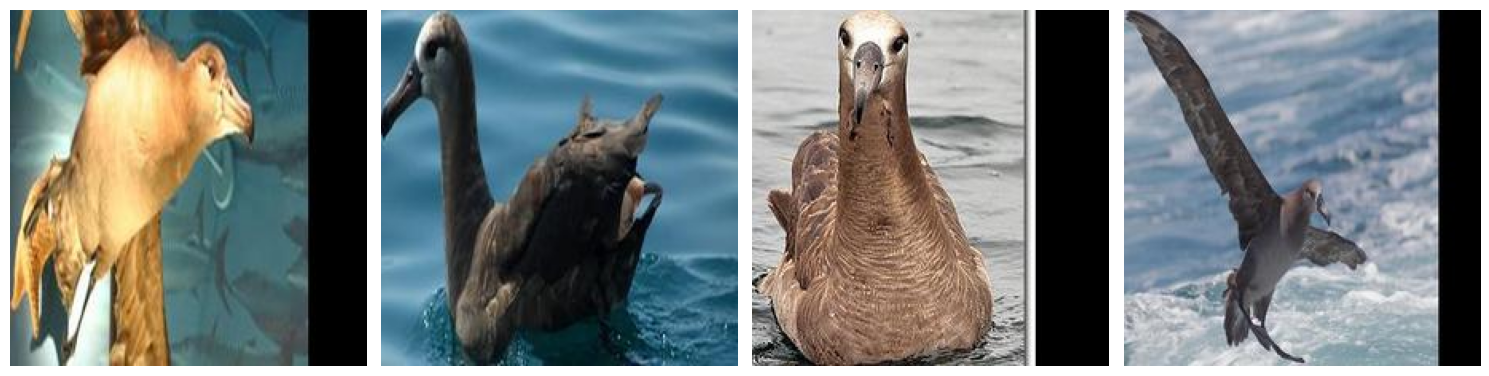

In [ ]:
# Directory containing images
image_folder = '/content/final_train/Class_0'

# List all files in the directory
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Randomly select 4 images
selected_images = random.sample(image_files, 4)

# Set up the plot
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()

# Display each image
for ax, image_name in zip(axes, selected_images):
    image_path = os.path.join(image_folder, image_name)
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

## **Data Augmentation**

In [ ]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
])

## **Models**

In [ ]:
train_dir = '/content/train_data'
test_dir = '/content/test_data'

In [ ]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size= (224, 224),
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size= (224, 224),
    batch_size=32
)

Found 5000 files belonging to 200 classes.
Found 994 files belonging to 200 classes.


In [ ]:
class_name=train_ds.class_names

### **Model 1**

In [ ]:

model = tf.keras.applications.ConvNeXtLarge(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
     name="convnext_large"
)
model.trainable = False

785596384/785596384 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
x = model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
outputs = tf.keras.layers.Dense(200, activation='softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [ ]:
EPOCH = 25
fitted_model = model.fit(
    train_ds,
    epochs=EPOCH,
    validation_data=test_ds
)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.3382 - loss: 3.4937 - val_accuracy: 0.7555 - val_loss: 0.9203
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 918ms/step - accuracy: 0.8452 - loss: 0.6460 - val_accuracy: 0.8038 - val_loss: 0.7169
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 203s 922ms/step - accuracy: 0.9151 - loss: 0.3725 - val_accuracy: 0.8139 - val_loss: 0.6626
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 916ms/step - accuracy: 0.9482 - loss: 0.2548 - val_accuracy: 0.8179 - val_loss: 0.6373
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.9605 - loss: 0.1805

In [ ]:
model1.evaluate(test_ds)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6919 - loss: 1.1751


[1.1401461362838745, 0.6936872601509094]

In [ ]:
model1.save_weights('model1_weights.weights.h5')

### **Model 2**

In [ ]:
inputshape = (224, 224, 3)
base_model2 = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=inputshape
)
base_model2.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inputs = tf.keras.layers.Input(shape=inputshape, name='input_layer')
x = base_model2(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
outputs = tf.keras.layers.Dense(200, activation='softmax', name='output_layer')(x)
model2 = tf.keras.Model(inputs, outputs)

In [ ]:
model2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [ ]:
EPOCH = 20
fitted_model_2 = model2.fit(
    train_ds,
    epochs=EPOCH,
    validation_data=test_ds
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.8942 - loss: 0.8092 - val_accuracy: 0.3924 - val_loss: 8.8022
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9340 - loss: 0.4206 - val_accuracy: 0.4118 - val_loss: 8.0883
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9602 - loss: 0.2611 - val_accuracy: 0.4232 - val_loss: 7.7064
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9723 - loss: 0.1642 - val_accuracy: 0.4319 - val_loss: 7.4792
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9812 - loss: 0.1092 - val_accuracy: 0.4347 - val_loss: 7.3239
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9840 - loss: 0.0782 - val_accuracy: 0.4347 - val_loss: 7.2230
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9921 - loss: 0.0534 - val_accuracy: 0.4354 - val_loss: 7.1499
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9942 - loss: 0.0379 - val_acc

In [ ]:
model2.evaluate(test_ds)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4526 - loss: 6.6824


[6.873909950256348, 0.4461979866027832]

### **Model 3**

In [ ]:
inputshape = (224, 224, 3)
base_model3 = tf.keras.applications.ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=inputshape
)
base_model3.trainable = False

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inputs = tf.keras.layers.Input(shape=inputshape, name='input_layer')
x = base_model3(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
outputs = tf.keras.layers.Dense(200, activation='softmax', name='output_layer')(x)
model3 = tf.keras.Model(inputs, outputs)

In [ ]:
model3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [ ]:
EPOCH = 20
fitted_model_3 = model3.fit(
    train_ds,
    epochs=EPOCH,
    validation_data=test_ds
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - accuracy: 0.0941 - loss: 5.2290 - val_accuracy: 0.3185 - val_loss: 2.8949
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6362 - loss: 1.6325 - val_accuracy: 0.4024 - val_loss: 2.4527
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8375 - loss: 0.8748 - val_accuracy: 0.4469 - val_loss: 2.2689
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9268 - loss: 0.5265 - val_accuracy: 0.4627 - val_loss: 2.1658
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9734 - loss: 0.3280 - val_accuracy: 0.4727 - val_loss: 2.1322
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9918 - loss: 0.2200 - val_accuracy: 0.4806 - val_loss: 2.1005
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9968 - loss: 0.1544 - val_accuracy: 0.4907 - val_loss: 2.0683
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9995 - loss: 0.1153 - val_ac

In [ ]:
model3.evaluate(test_ds)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5225 - loss: 2.2120


[2.0831942558288574, 0.5344333052635193]

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1_weights.weights.h5')
model1.summary()

OSError: Unable to synchronously open file (file signature not found)

### **Read Test images**

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data['bbox'] = test_data['bbox'].apply(lambda x: tuple(map(float, x.split())))

In [ ]:
test_data.head()

path                          bbox
0    images/test/test_81.jpg  (241.0, 113.0, 202.0, 257.0)
1  images/test/test_1592.jpg  (119.0, 121.0, 294.0, 337.0)
2   images/test/test_565.jpg    (33.0, 45.0, 237.0, 139.0)
3  images/test/test_2078.jpg    (58.0, 95.0, 262.0, 210.0)
4  images/test/test_3645.jpg   (32.0, 141.0, 348.0, 281.0)

### **Load Data**

In [ ]:
def save_cropped_images(df):
    """
    Crops images based on bounding box coordinates and saves them to the original location.

    Args:
        df (pandas.DataFrame): A DataFrame with the following columns:
            - 'path': Path to the image file.
            - 'bbox': Bounding box coordinates for cropping (x_min, y_min, width, height).
    """
    # Create 'test_images' folder if it doesn't exist
    output_folder = "test_images"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        img_path = row['path']
        bbox = row['bbox']

        # Get the cropped image
        cropped_img = crop_func(img_path, bbox)

        # Save the cropped image to the 'test_images' folder
        img_name = os.path.basename(img_path)
        new_img_path = os.path.join(output_folder, img_name)

        cropped_img.save(new_img_path)
        print(f"Saved cropped image: {new_img_path}")

# Apply the cropping function
save_cropped_images(test_data)

Streaming output truncated to the last 5000 lines.
Saved cropped image: test_images/test_1174.jpg
Saved cropped image: test_images/test_193.jpg
Saved cropped image: test_images/test_5576.jpg
Saved cropped image: test_images/test_4788.jpg
Saved cropped image: test_images/test_2327.jpg
Saved cropped image: test_images/test_2156.jpg
Saved cropped image: test_images/test_5482.jpg
Saved cropped image: test_images/test_5774.jpg
Saved cropped image: test_images/test_444.jpg
Saved cropped image: test_images/test_1262.jpg
Saved cropped image: test_images/test_3140.jpg
Saved cropped image: test_images/test_4041.jpg
Saved cropped image: test_images/test_4437.jpg
Saved cropped image: test_images/test_3440.jpg
Saved cropped image: test_images/test_3105.jpg
Saved cropped image: test_images/test_5289.jpg
Saved cropped image: test_images/test_4543.jpg
Saved cropped image: test_images/test_1286.jpg
Saved cropped image: test_images/test_2314.jpg
Saved cropped image: test_images/test_4608.jpg
Saved cropp

### **Check the Size**

In [ ]:
from PIL import Image  # This imports the Image module
import os

# Specify the path to the folder containing the images
folder_path = '/content/test_images'

# Get the list of image files in the folder
image_files = os.listdir(folder_path)

# Filter to only include image files (if needed)
image_files = [file for file in image_files if file.endswith(('png', 'jpg', 'jpeg'))]

# Open the first image
for i in range(3):
    first_image_path = os.path.join(folder_path, image_files[i])
    with Image.open(first_image_path) as img:
        # Get the image size
        width, height = img.size

    print(f"The size of the first image is {width}x{height} pixels.")


### **Image Resize**

In [ ]:
from PIL import Image
import os

# Directory containing the images
input_dir = '/content/test_images'
output_dir = '/content/test_images'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Resize each image in the directory to 200x200
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        img_resized = img.resize((224, 224))
        img_resized.save(os.path.join(output_dir, filename))

print(f"All images resized and saved to {output_dir}")

All images resized and saved to /content/test_images


In [ ]:
img_path = '/content/test_images/test_10.jpg'
a = mpimg.imread(img_path)
plt.imshow(a)
plt.show()

### **Predict**

In [ ]:
import numpy as np

def predict_image_class(img_path, model, class_names):
    # Load and preprocess the image
    a = mpimg.imread(img_path)
    a = np.expand_dims(a, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(a)

    # Get the index of the highest probability
    predicted_class = np.argmax(predictions, axis=1)

    # Get the class name
    predicted_class_name = class_names[predicted_class[0]]

    # Get the confidence score (max probability value)
    confidence_score = np.max(predictions)

    return predicted_class_name, confidence_score

# Example usage
img_path = '/content/test_images/test_1.jpg'

# Assuming you have class names in the order used during training
class_names = train_ds.class_names

predicted_class, confidence_score = predict_image_class(img_path, model1, class_names)
print(f'The predicted class is: {predicted_class} with a confidence score of: {confidence_score:.2f}')


In [ ]:
img_path = '/content/test_images/test_1.jpg'
a = mpimg.imread(img_path)
plt.imshow(a)
plt.show()

In [ ]:
import os

def get_file_paths(folder_path):
    # List to store file paths
    file_paths = []

    # Iterate over each file in the directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Construct full file path
            file_path = os.path.join(root, file)
            file_paths.append(file_path)

    return file_paths

# Example usage
folder_path = '/content/test_images'  # Replace with your folder path
all_file_paths = get_file_paths(folder_path)

# Print the list of file paths



In [ ]:
len(all_file_paths)

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def predict_image_class(img_path, model, class_names):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Apply preprocessing specific to your model

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_class_name = class_names[predicted_class[0]]
    confidence_score = np.max(predictions)
    return predicted_class_name, confidence_score

def predict_for_list(path_list, model, class_names):
    # Create a list to store the results
    results = []

    # Iterate over each image in the folder
    for img_name in path_list:
        img_path = os.path.join(folder_path, img_name)

        # Predict class and confidence score for the image
        predicted_class, confidence_score = predict_image_class(img_path, model, class_names)

        # Add the result as a dictionary to the list
        results.append({
            'image_path': img_path,
            'predicted_class': predicted_class,
            'confidence_score': confidence_score
        })

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(results)

    return df

In [ ]:
df1=predict_for_list(all_file_paths[0:1000],model1,class_name)

In [ ]:
(df1)

image_path predicted_class  confidence_score
0     /content/test_images/test_996.jpg       Class_109          0.890944
1    /content/test_images/test_2215.jpg       Class_181          0.751074
2    /content/test_images/test_2929.jpg        Class_61          0.501424
3    /content/test_images/test_3805.jpg       Class_133          0.436393
4    /content/test_images/test_5156.jpg       Class_130          0.343253
..                                  ...             ...               ...
995  /content/test_images/test_4798.jpg       Class_133          0.399810
996  /content/test_images/test_1046.jpg        Class_69          0.999321
997  /content/test_images/test_4050.jpg        Class_70          0.189978
998  /content/test_images/test_3437.jpg        Class_16          0.946424
999  /content/test_images/test_4828.jpg        Class_70          0.452962

[1000 rows x 3 columns]

In [ ]:
df2=predict_for_list(all_file_paths[1000:2000],model1,class_name)

In [ ]:
df3=predict_for_list(all_file_paths[2000:3000],model1,class_name)

In [ ]:
df4=predict_for_list(all_file_paths[3000:4000],model1,class_name)

In [ ]:
df5=predict_for_list(all_file_paths[4000:5000],model1,class_name)

In [ ]:
df6=predict_for_list(all_file_paths[5000:5795],model1,class_name)

In [ ]:
dataframes = [df1, df2, df3, df4, df5, df6]

# Concatenate all dataframes
merged_df = pd.concat(dataframes, ignore_index=True)

# Optional: Reset index if needed
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
print(merged_df)

In [ ]:
merged_df['path'] = merged_df['image_path'].str.replace('/content/test_images', 'images', regex=False)
# Remove "Class_" from the Class column
merged_df['predicted_label'] = merged_df['predicted_class'].str.replace('Class_', '', regex=False)

In [ ]:
final_df = merged_df.drop(['predicted_class', 'image_path'], axis = 1 )

In [ ]:
final_df

In [ ]:
final_df.to_csv("final.csv")

# **Helper Functions**

In [ ]:
import requests

def send_results_for_evaluation(name, csv_file, email):
    url = "http://43.205.49.236:5050/inference"
    files = {'file': open(csv_file, 'rb')}
    data = {'email': email, 'name':name}
    response = requests.post(url, files=files, data=data)
    return response.json()



# ***Test Inference***


This function is used to save the csv file and send it to the evaluation server.

Format of CSV file (Follow the header names strictly):

        path (str)              predicted_label(int)   confidence_score(float)
    images/test/xx.jpg                  1                         0.6
    images/test/yy.jpg                  2                         0.9
            :                           :                          :
            :                           :                          :

Once the prediction file is saved as shown in the above format, you can send it to the evaluation server along with your email.

Caution: check your **email** before executing the cell.


In [ ]:

print('Accuracy: ')
print(send_results_for_evaluation('Satvik Marwah', '/content/final.csv', 'satvikmarwah52@gmail.com'))




Accuracy: 69%
{'overall_accuracy (%)': 36.17535, 'max_accuracy_class': 99, 'max_accuracy (%)': 96.66667, 'min_accuracy_class': 179, 'min_accuracy (%)': 0.0}
